In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.2


In [2]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/kaggle/input/wangwenkai40/BYT", validation_split=0.2, subset="training",
  seed=123, image_size=(1236, 1626), batch_size=10)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/kaggle/input/wangwenkai40/BYT", validation_split=0.2, subset="validation",
  seed=123, image_size=(1236, 1626), batch_size=10)
class_names = train_ds.class_names
print(class_names)
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 199 files belonging to 2 classes.
Using 160 files for training.


2022-03-31 02:23:38.872896: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Found 199 files belonging to 2 classes.
Using 39 files for validation.
['0_Back', '1_Front']


2022-03-31 02:23:38.966625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 02:23:38.967302: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 02:23:38.970230: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-31 02:23:38.971498: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

2022-03-31 02:23:41.294112: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


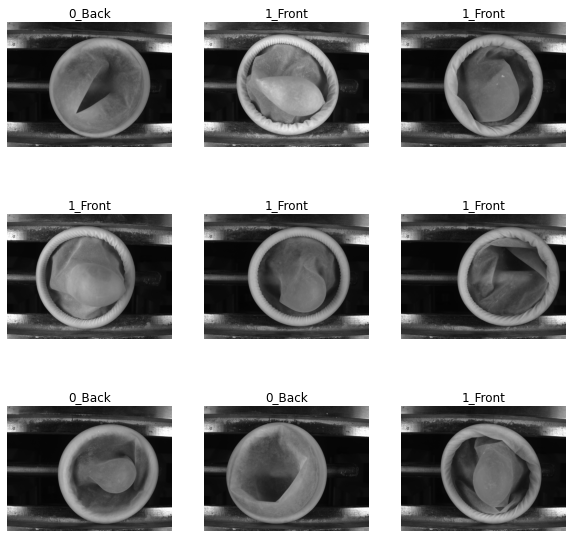

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(1236, 1626, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '
2022-03-31 02:23:52.128241: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


16/16 [==============================] - 14s 395ms/step - loss: 9.0766 - accuracy: 0.5500 - val_loss: 0.5981 - val_accuracy: 0.6667
Epoch 2/10
16/16 [==============================] - 4s 239ms/step - loss: 0.4115 - accuracy: 0.8125 - val_loss: 0.2908 - val_accuracy: 0.8974
Epoch 3/10
16/16 [==============================] - 4s 238ms/step - loss: 0.1893 - accuracy: 0.9438 - val_loss: 0.8992 - val_accuracy: 0.6410
Epoch 4/10
16/16 [==============================] - 4s 240ms/step - loss: 0.1237 - accuracy: 0.9375 - val_loss: 0.0551 - val_accuracy: 1.0000
Epoch 5/10
16/16 [==============================] - 4s 238ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0978 - val_accuracy: 0.9487
Epoch 6/10
16/16 [==============================] - 4s 239ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 7/10
16/16 [==============================] - 4s 238ms/step - loss: 1.2293e-04 - accuracy: 1.0000 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 8/10
1